# **Problem Statement**

---

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.


# **Customer Purchase Prediction using Decision Tree Analysis: Leveraging Demographic and Behavioral Insights** 
# By-Ritika

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import plot_tree
warnings.filterwarnings('ignore')

In [2]:
# Loading Data
df =pd.read_csv('bank-additional.csv',delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [5]:
df.shape

(4119, 21)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Categorize Categorical values and Numerical values

In [10]:
catego = df.select_dtypes(include='object').columns
print(catego)
numeric = df.select_dtypes(exclude='object').columns
print(numeric)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [11]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


# Visualizating Data

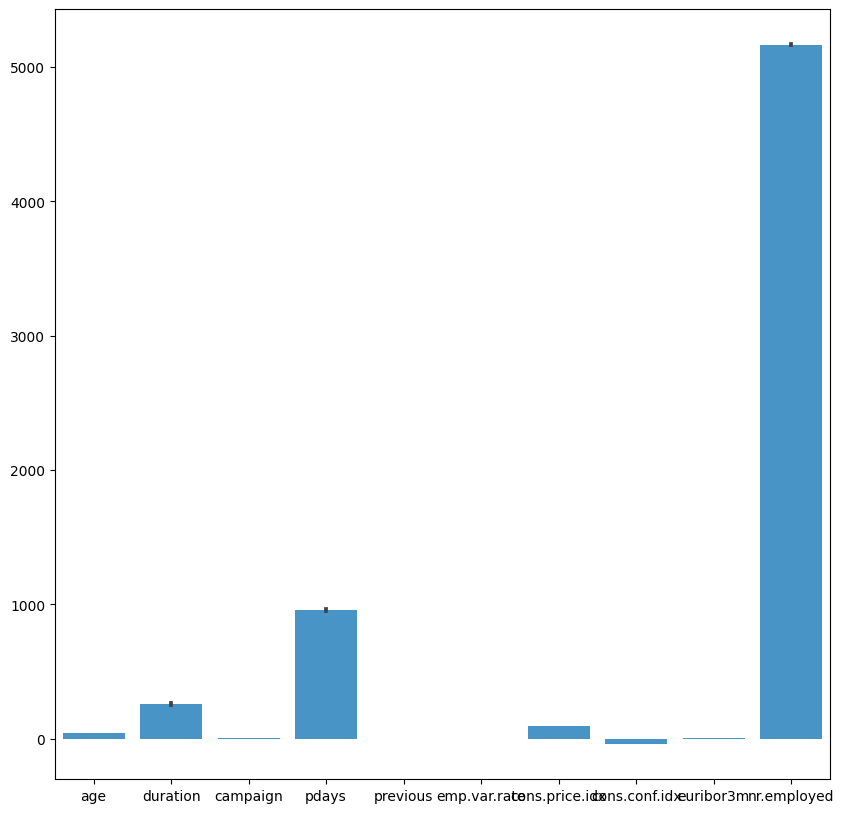

In [12]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df, color='#3498DB')  # Using Seaborn for bar plot
plt.show()

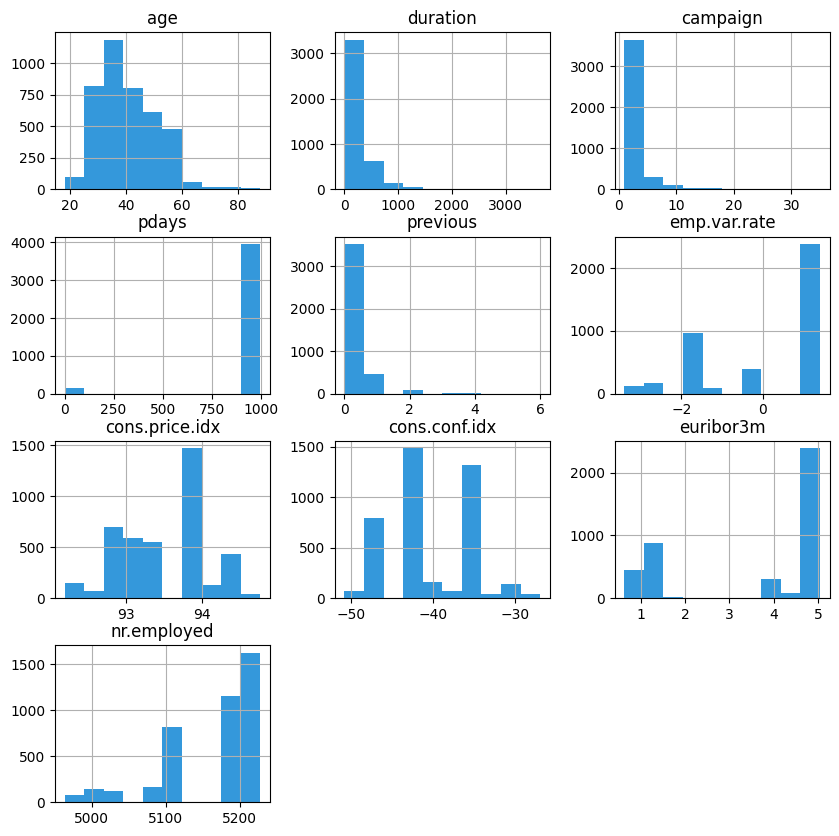

In [13]:
df.hist(figsize=(10,10), color='#3498DB')
plt.show()

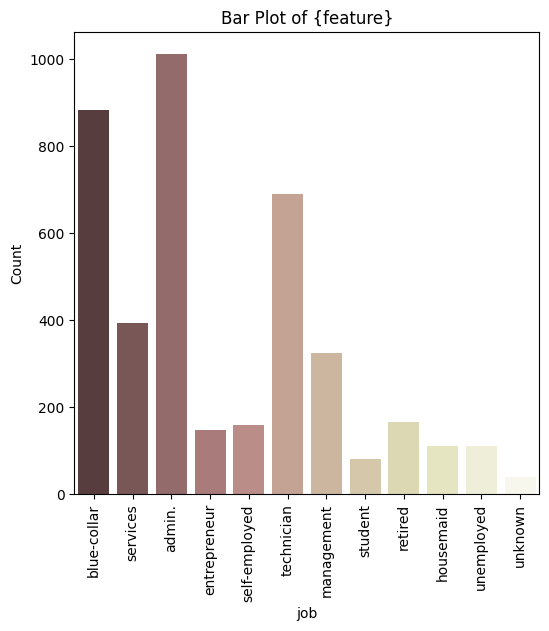

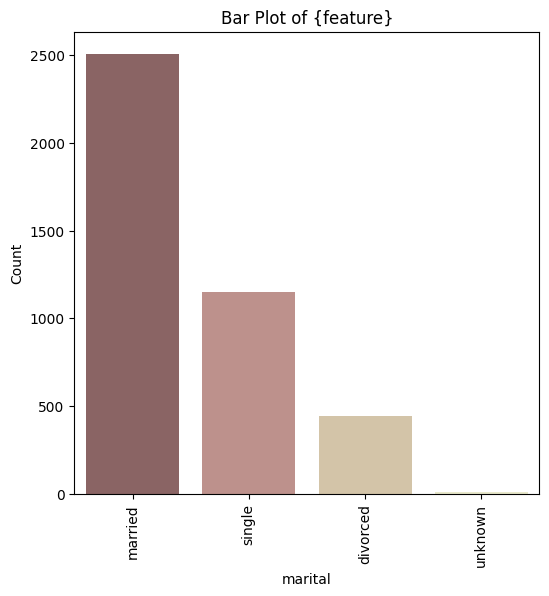

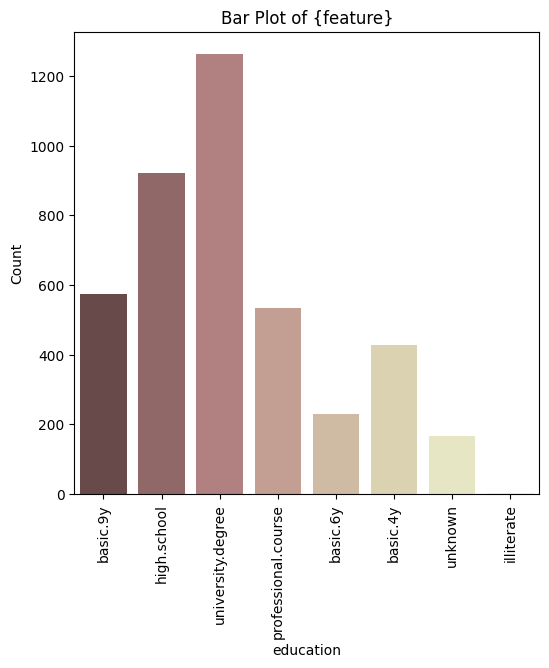

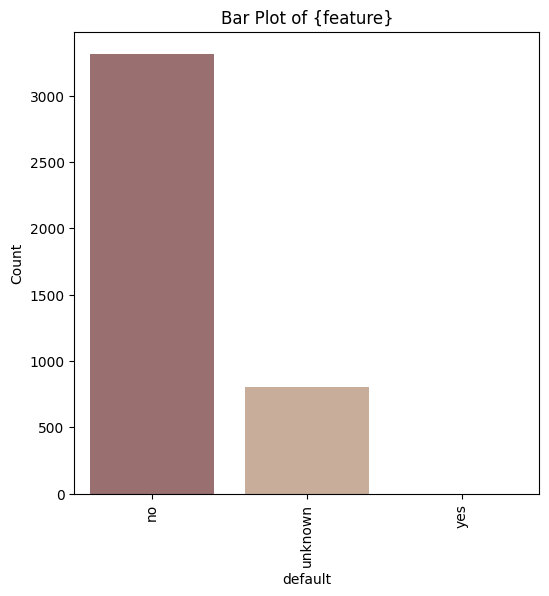

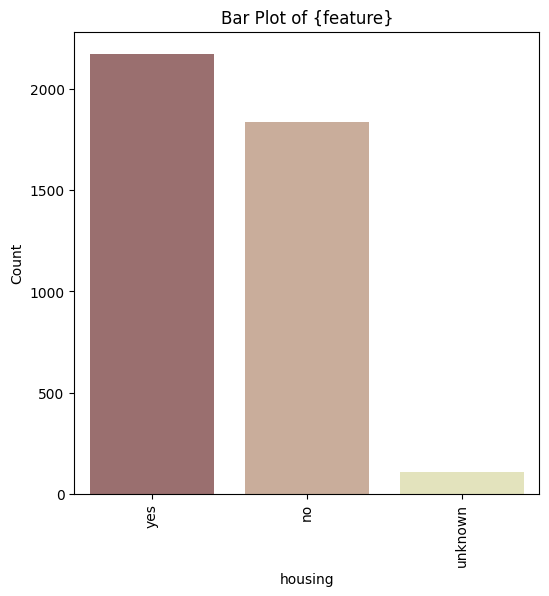

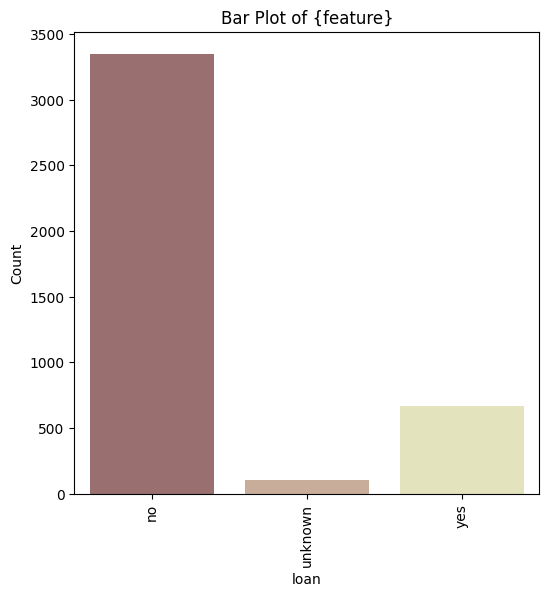

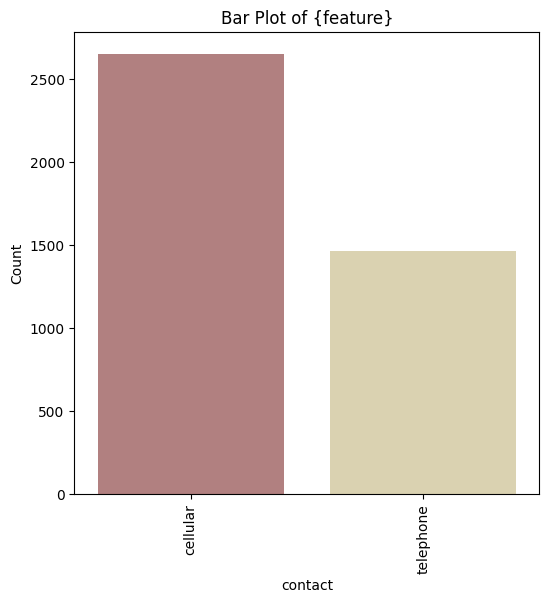

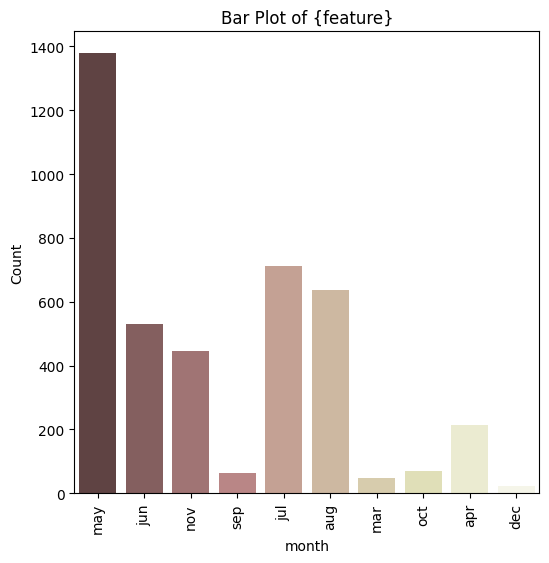

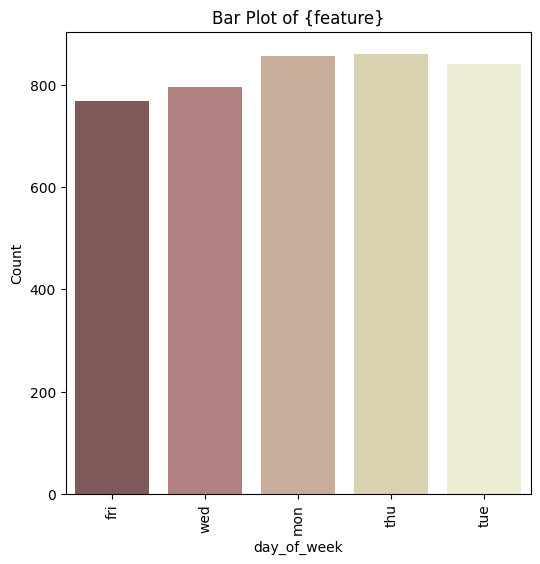

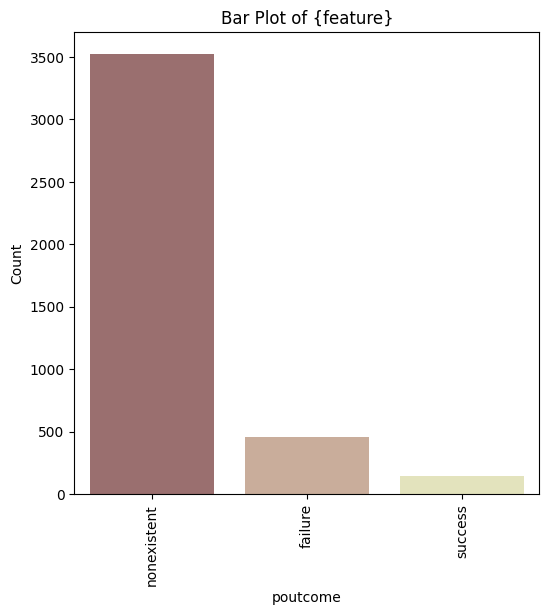

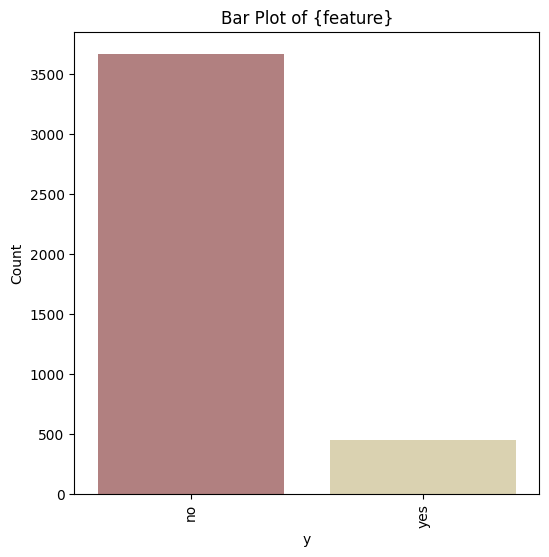

In [14]:
for features in catego:
  plt.figure(figsize=(6,6))
  sns.countplot(x=features, data=df, palette='pink')
  plt.title("Bar Plot of {feature}")
  plt.xlabel(features)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.show()

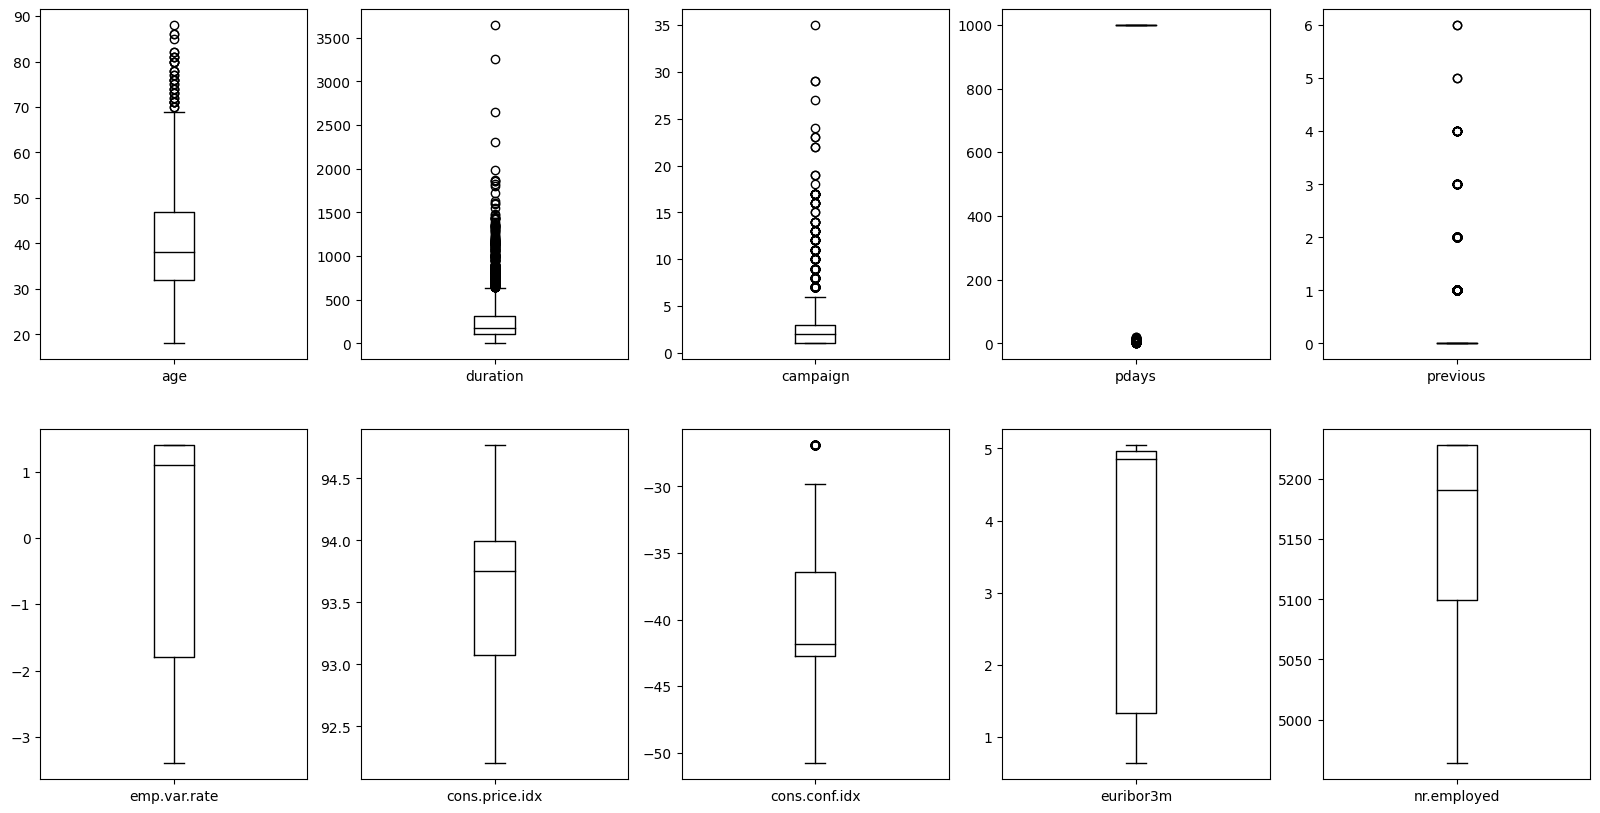

In [15]:
df.plot(kind='box', subplots=True, layout=(2, 5), figsize=(20, 10), color='black')
plt.show()


In [16]:
# Calculate the first and third quartiles
Q1 = df[['age', 'duration', 'campaign']].quantile(0.25)
Q3 = df[['age', 'duration', 'campaign']].quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers in the specified columns
filtered_df = df[~((df[['age', 'duration', 'campaign']] < lower_bound) | (df[['age', 'duration', 'campaign']] > upper_bound)).any(axis=1)]

# Now you can proceed with the cleaned `filtered_df` without outliers


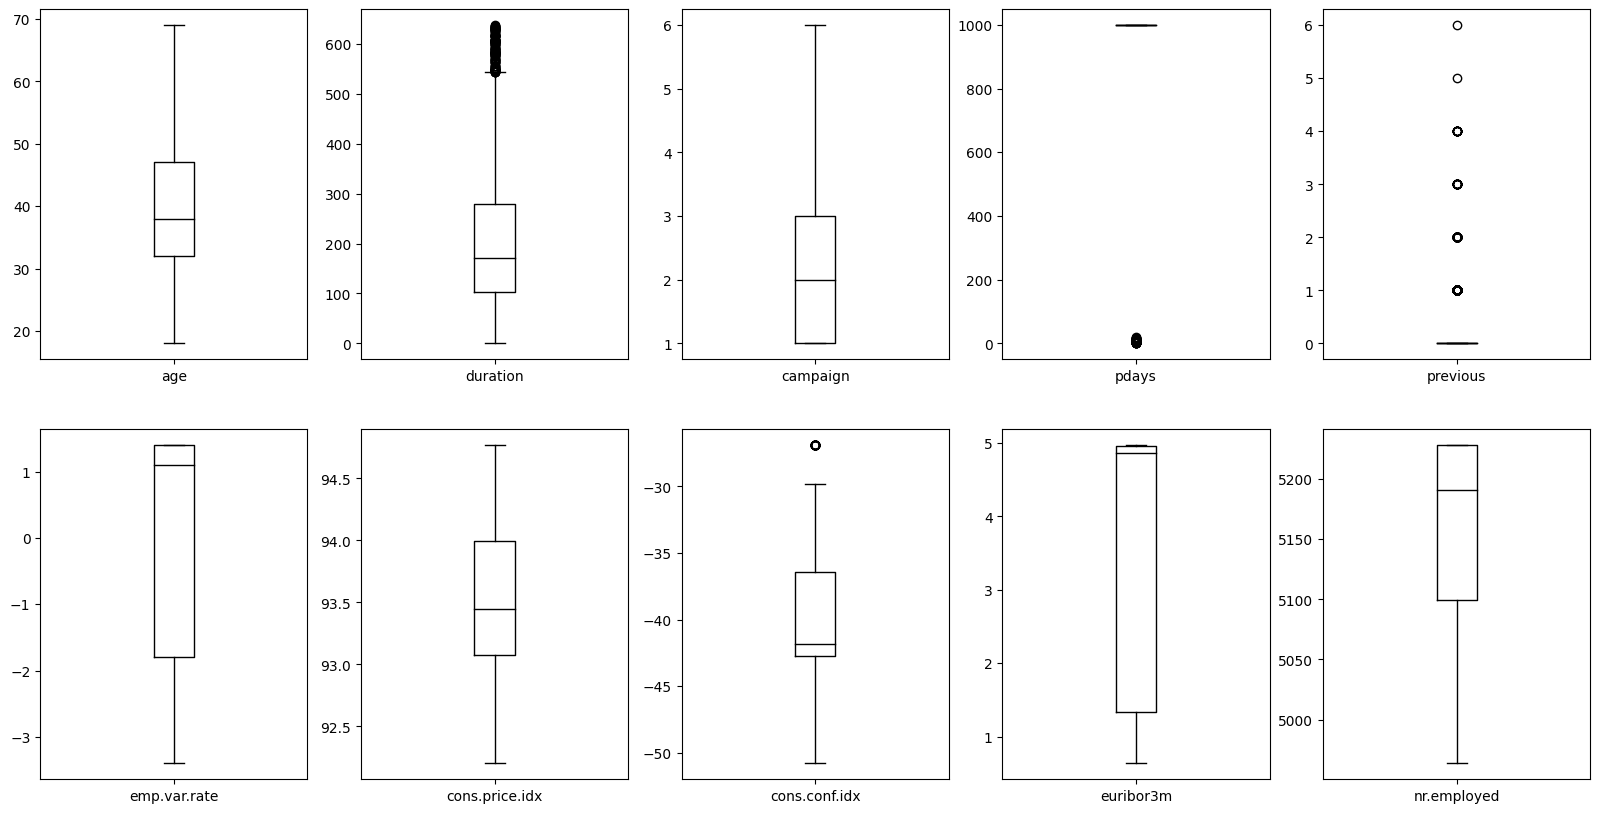

In [17]:
filtered_df.plot(kind='box', subplots=True, layout=(2,5), figsize=(20, 10), color='black' )
plt.show()

In [18]:
df.cov()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,106.365426,108.485233,-0.375289,-85.953760,0.284585,-0.309390,-0.002880,4.650189,-0.268775,-31.861567
duration,108.485233,64873.993194,-55.827821,-2297.434781,3.549821,-11.485410,2.460196,-40.660252,-14.274935,-829.675833
campaign,-0.375289,-55.827821,6.595442,28.953058,-0.127299,0.706837,0.215771,0.093009,0.709828,30.466710
pdays,-85.953760,-2297.434781,28.953058,36834.355710,-61.135016,81.204428,6.501507,-81.205309,100.306449,5400.687089
previous,0.284585,3.549821,-0.127299,-61.135016,0.293535,-0.351656,-0.051766,-0.128000,-0.430971,-20.549040
emp.var.rate,-0.309390,-11.485410,0.706837,81.204428,-0.351656,2.443327,0.683859,1.400618,2.629342,103.310720
cons.price.idx,-0.002880,2.460196,0.215771,6.501507,-0.051766,0.683859,0.335645,0.122006,0.660021,20.168573
cons.conf.idx,4.650189,-40.660252,0.093009,-81.205309,-0.128000,1.400618,0.122006,21.110142,2.203113,36.234946
euribor3m,-0.268775,-14.274935,0.709828,100.306449,-0.430971,2.629342,0.660021,2.203113,3.005339,120.378107
nr.employed,-31.861567,-829.675833,30.466710,5400.687089,-20.549040,103.310720,20.168573,36.234946,120.378107,5426.960015


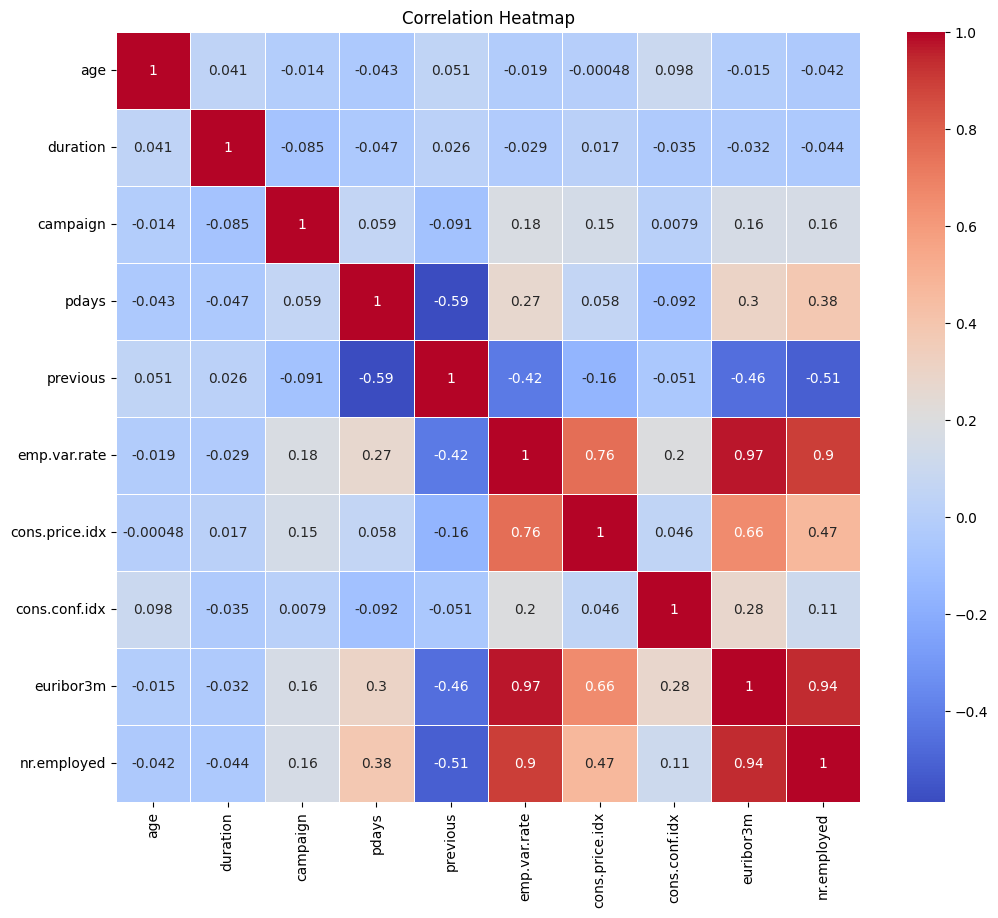

In [19]:
selected_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
                    'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
                    'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

# Create a correlation matrix
correlation_matrix = df[selected_columns].corr()

# Set up the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# **Feature selection**

In [20]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [21]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [22]:
df1.drop(high_corr_cols,inplace=True,axis=1)  # axis=1 indicates columns
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'y'],
      dtype='object')

In [23]:
df1.shape

(4119, 18)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handle missing values (if any)
df.dropna(inplace=True)

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [37]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'y' column to convert 'no' and 'yes' to 0 and 1
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate recall, F1 score, and confusion matrix
recall = recall_score(y_test_encoded, y_pred_encoded)
f1 = f1_score(y_test_encoded, y_pred_encoded)
confusion = confusion_matrix(y_test_encoded, y_pred_encoded)

# Print the updated evaluation metrics
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")


Recall: 0.4673913043478261
F1 Score: 0.4479166666666667
Confusion Matrix:
[[675  57]
 [ 49  43]]


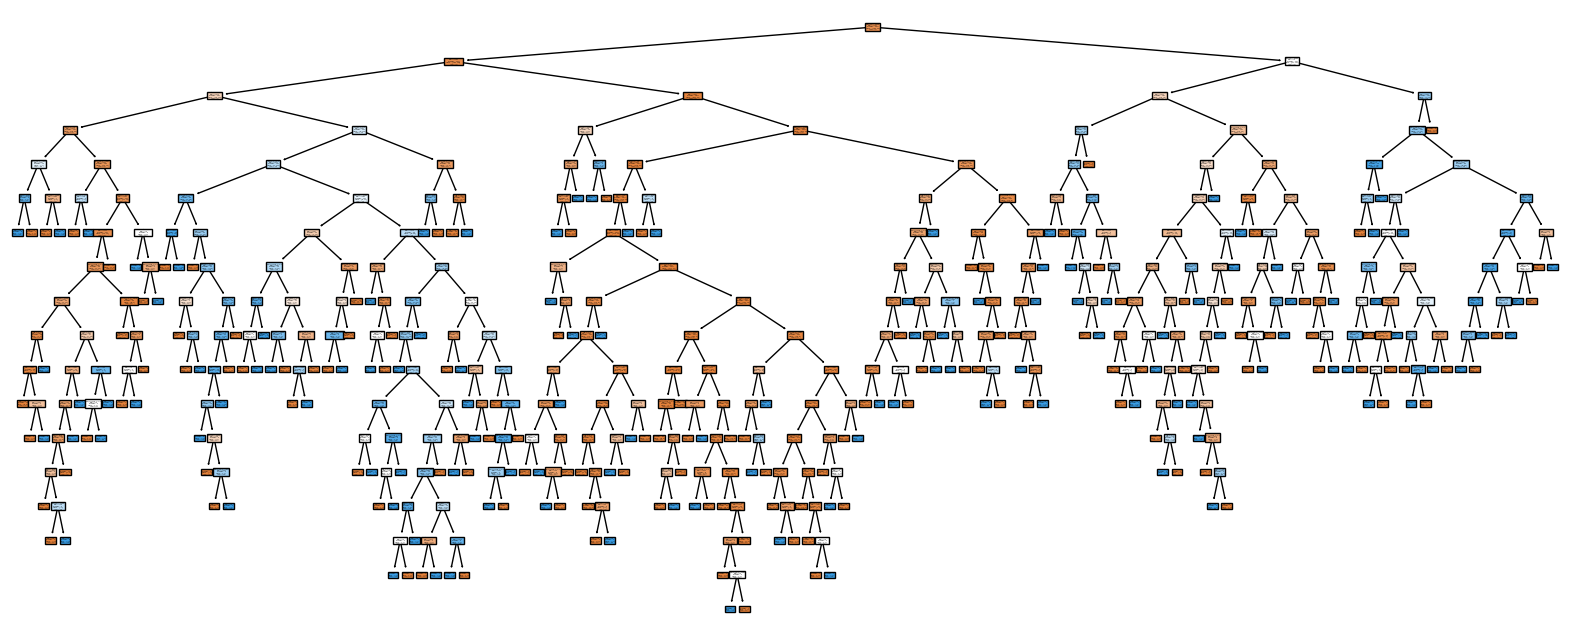

In [39]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.show()
